In [2]:
"""Name : Sourav Roy Choudhury
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
%matplotlib inline

ad = pd.read_csv('/Users/souravroychoudhury/downloads/automobile_data.csv')
ad.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
ad.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


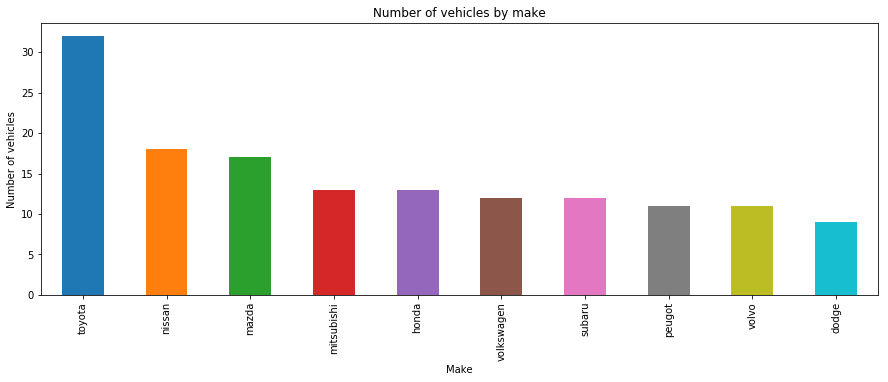

In [3]:
#Bar Graphs
ad.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

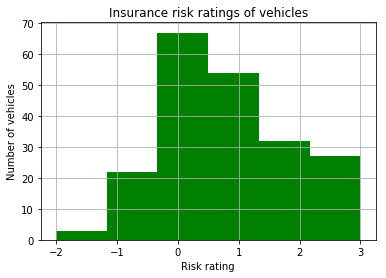

In [4]:
#Histogram
ad.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

In [5]:
#Checking the number of invalid variables in normalised-losses column to avoid data discrepancy
ad['normalized-losses'].loc[ad['normalized-losses'] == '?'].count()

41

In [6]:
#Converting non numeric number normalised losses to numeric by taking the mean
nl = ad['normalized-losses'].loc[ad['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
ad['normalized-losses'] = ad['normalized-losses'].replace('?',nlmean).astype(int)
ad['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

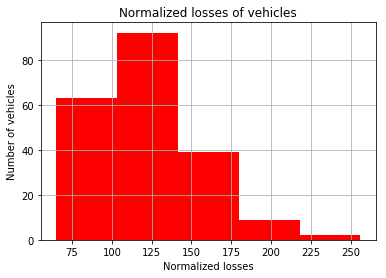

In [7]:
#Histogram
ad['normalized-losses'].hist(bins=5,color='red');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

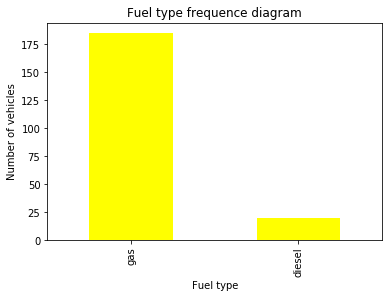

In [8]:
#Bar graph
ad['fuel-type'].value_counts().plot(kind='bar',color='yellow')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

Text(0.5, 1.0, 'Body Style Percent pie diagram')

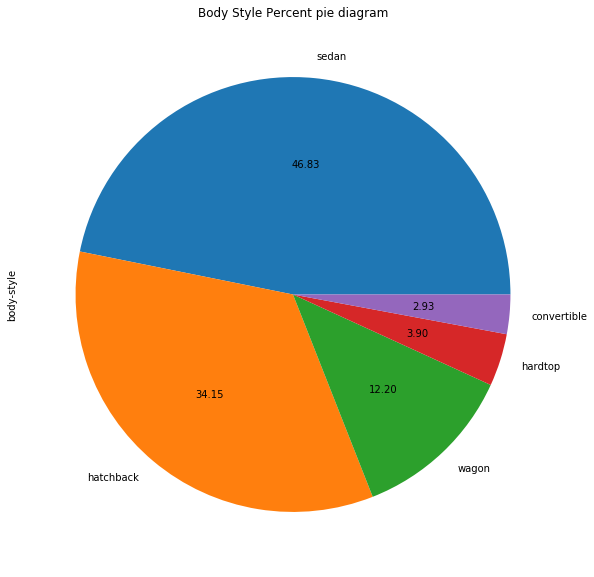

In [9]:
#Pie Chart
ad['body-style'].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')
plt.title("Body Style Percent pie diagram")

In [10]:
#Checking price elements that are non numeric
ad['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [11]:
#Shows prices that are non numeric
ad['price'].loc[ad['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [12]:
#Replace non numeric price values with numberic means
price = ad['price'].loc[ad['price'] != '?']
pmean = price.astype(str).astype(int).mean()
ad['price'] = ad['price'].replace('?',pmean).astype(int)
ad['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

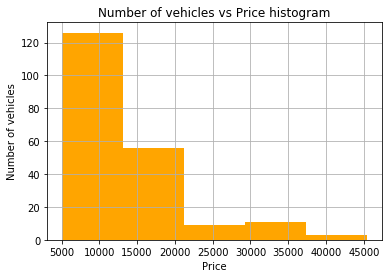

In [13]:
#Histogram
ad['price'].hist(bins=5,color='orange');
plt.title("Number of vehicles vs Price histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Price');

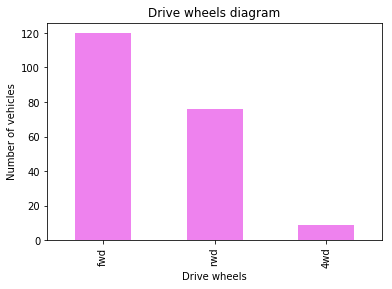

In [14]:
#Bar Graph
ad['drive-wheels'].value_counts().plot(kind='bar',color='violet')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

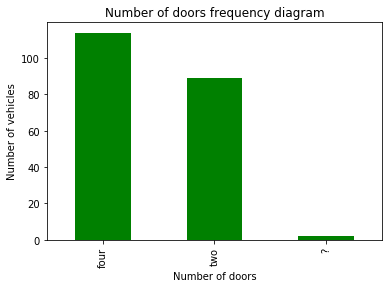

In [15]:
#Bar Graph
ad['num-of-doors'].value_counts().plot(kind='bar',color='green')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

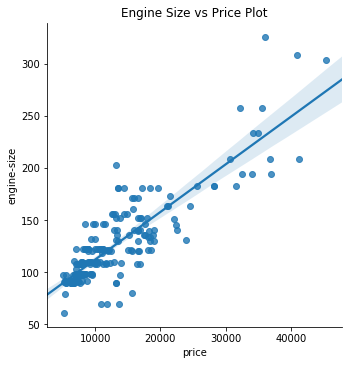

In [32]:
# LM Plot
g = sns.lmplot('price','engine-size', ad);
plt.title('Engine Size vs Price Plot')
plt.show()

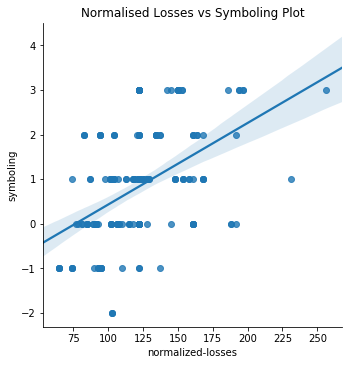

In [17]:
# LM Plot
g = sns.lmplot('normalized-losses','symboling', ad);
plt.title('Normalised Losses vs Symboling Plot')
plt.show()

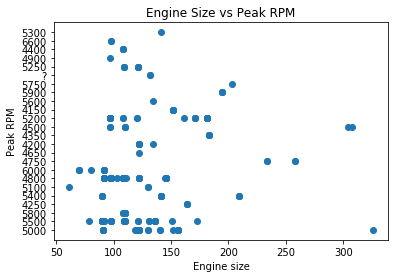

In [18]:
plt.scatter(ad['engine-size'],ad['peak-rpm'])
plt.title('Engine Size vs Peak RPM')
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

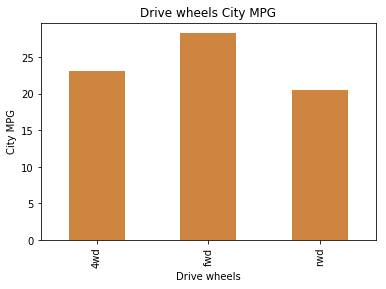

In [19]:
#Bar Graph
ad.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

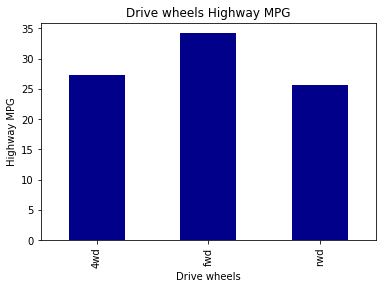

In [20]:
#Bar Graph
ad.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'DarkBlue');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

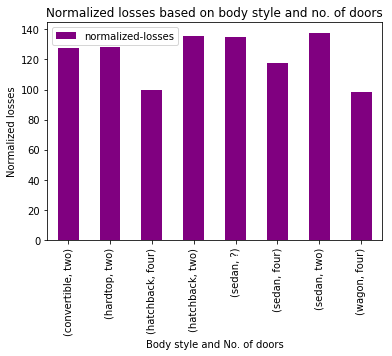

In [21]:
#Multi Characteristic Bar Graph using pivot table
pd.pivot_table(ad,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

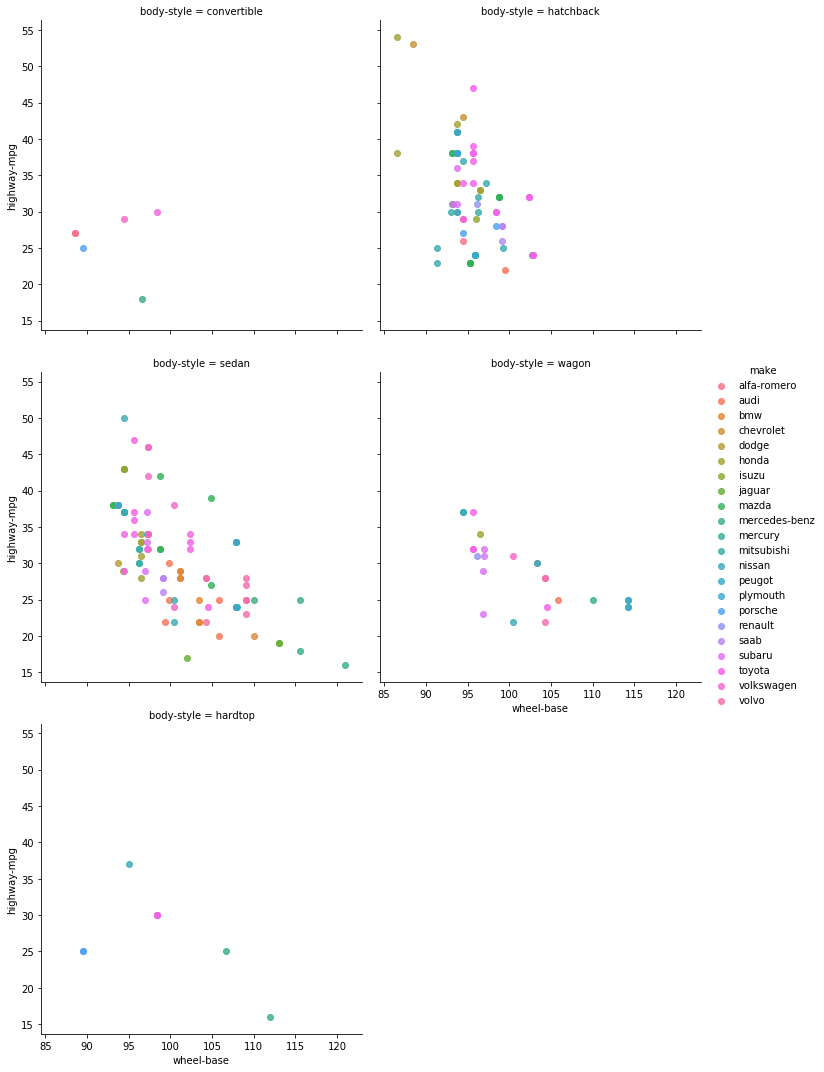

In [22]:
#LM Plot
g = sns.lmplot("wheel-base", "highway-mpg", data=ad, hue="make", fit_reg=False, col='body-style', col_wrap=2)

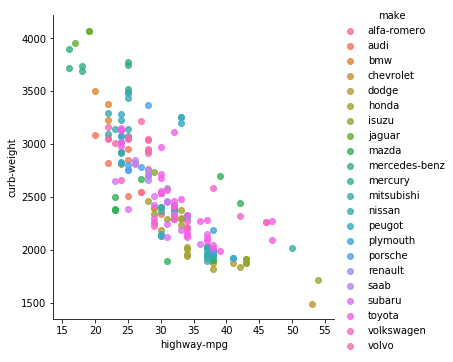

In [23]:
#LM Plot
g = sns.lmplot('highway-mpg',"curb-weight", ad, hue="make",fit_reg=False);

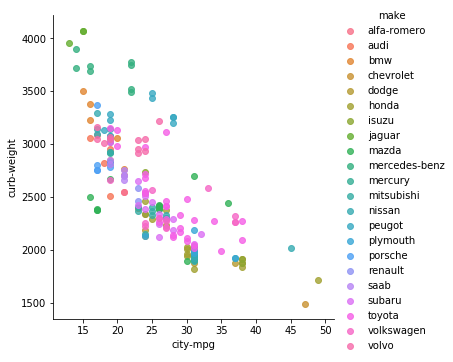

In [24]:
#LM Plot
g = sns.lmplot('city-mpg',"curb-weight", ad, hue="make", fit_reg=False);

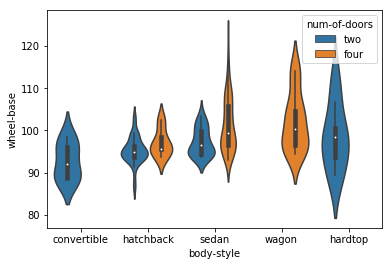

In [25]:
#Violin Plot
ad['num-of-doors'] = ad['num-of-doors'].str.replace('?', 'two')
sns.violinplot(x='body-style', y='wheel-base', hue='num-of-doors',figsize=(7,7), data=ad)
plt.show()

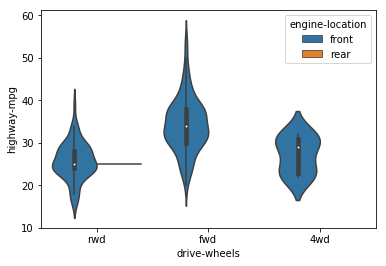

In [26]:
sns.violinplot(x='drive-wheels', y='highway-mpg', hue='engine-location',figsize=(8,8), data=ad)
plt.show()

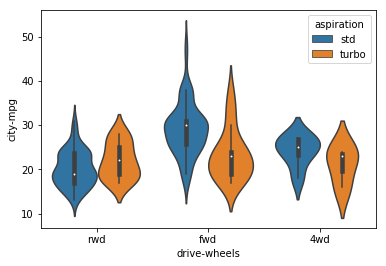

In [27]:
sns.violinplot(x='drive-wheels', y='city-mpg', hue='aspiration', figsize=(8,8), data=ad)
plt.show()

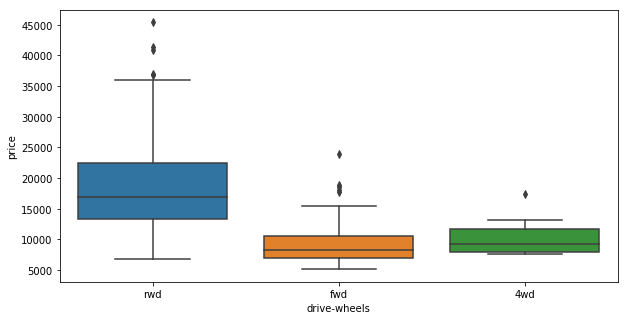

In [28]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=ad)

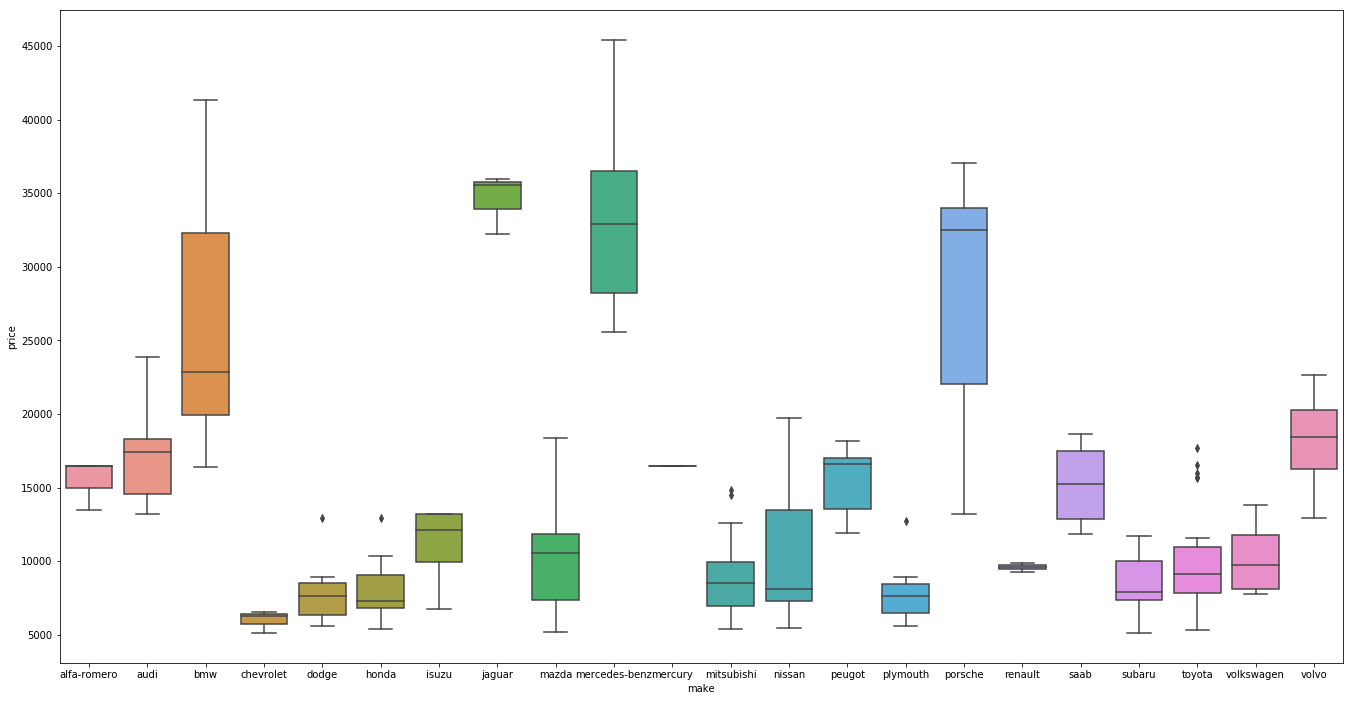

In [29]:
plt.rcParams['figure.figsize']=(23,12)
ax = sns.boxplot(x="make", y="price",data=ad)

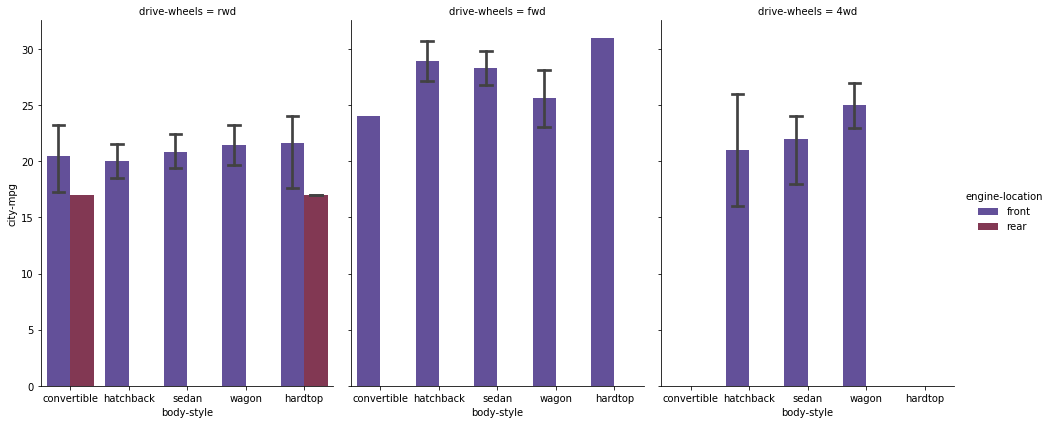

In [30]:
g = sns.catplot(x="body-style", y="city-mpg", hue="engine-location", col="drive-wheels",
                capsize=.2, palette="twilight", height=6, aspect=.75,
                kind="bar", data=ad)